(sec-law-large-numbers)=
# Legge dei grandi numeri

## Parametri e statistiche

In statistica, per *popolazione* si intende un insieme di elementi che presenta caratteristiche aleatorie, mentre per *campione* si intende un sottoinsieme della popolazione. Ma a cosa corrisponde in pratica la popolazione? Per uno psicologo la popolazione è un gruppo di individui. Per un biologo marino la popolazione è un gruppo di delfini, ad esempio. Nella maggior parte dei casi, le popolazioni oggetto di interesse per i ricercatori sono insiemi di entità concrete che esistono nel mondo reale. Dal punto di vista della statistica, invece, le popolazioni sono delle entità astratte. Infatti, gli statistici operazionalizzano il concetto di "popolazione" nei termini di un oggetto matematico che consente di essere manipolato con facilità. In precedenza noi abbiamo già incontrato questi oggetti matematici: sono le distribuzioni di probabilità.

L'idea è semplice. Supponiamo di occuparci del quoziente di intelligenza, QI. Abbiamo detto che, per uno psicologo, la popolazione di interesse solitamente è un gruppo di individui, ciascuno dei quali è dotato di uno specifico punteggio del QI. Uno statistico "semplifica" tale situazione definendo in maniera operativa la popolazione come la distribuzione di densità rappresentata nella figura seguente. In precedenza abbiamo visto infatti come una distribuzione di densità non sia altro che la descrizione matematica della "forma" di un istogramma che rappresenta un numero molto alto di osservazioni.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arviz as az
from scipy.stats import norm
import statistics
RANDOM_SEED = 2023
rng = np.random.default_rng(RANDOM_SEED)
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

In [12]:
μ, σ = 100, 15
size = 1000
x = np.random.normal(loc=μ, scale=σ, size=size)
print(*x[:5])

100.5430661031985 83.85769620814983 79.82737396708515 89.06900956437602 76.02697866302573


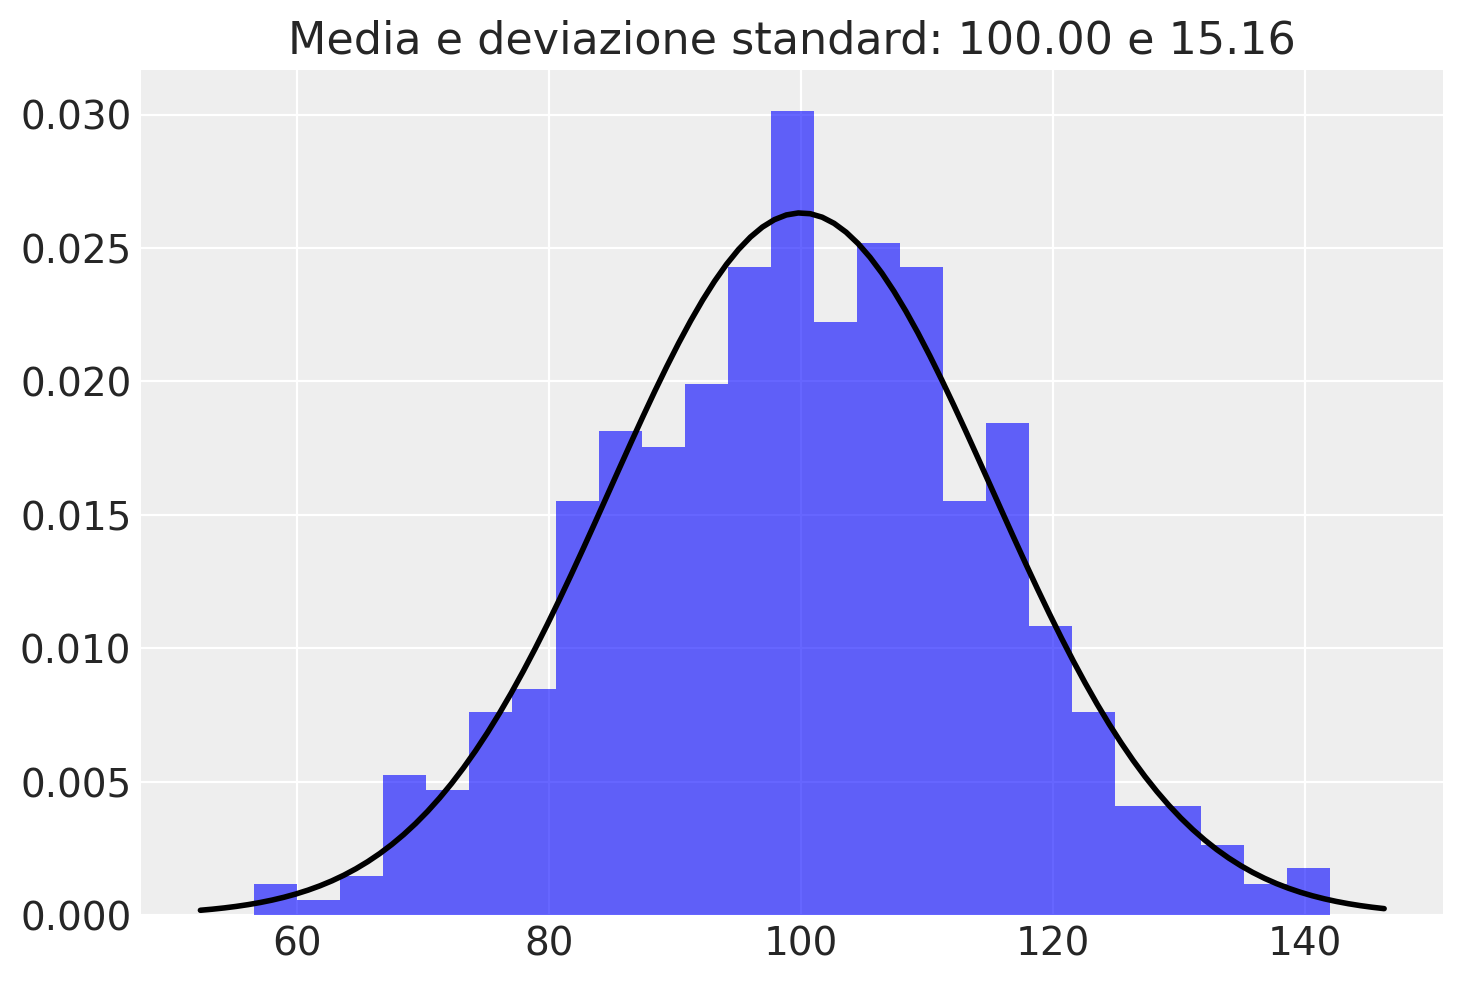

In [13]:
mu, std = norm.fit(x) 
  
# Plot the histogram.
plt.hist(x, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Media e deviazione standard: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

I test di intelligenza sono progettati in modo che il QI medio sia pari a 100, la deviazione standard dei punteggi QI sia uguale a 15 e la distribuzione dei punteggi del QI sia normale. I valori riportati sopra sono detti *parametri* in quanto descrivono le proprietà dell'intera popolazione. Cioè, diciamo che la media della popolazione è $\mu = 100$ e la deviazione standard della popolazione è $\sigma = 15$. Dal punto di vista statistico, dunque, possiamo rappresentare questa ipotetica popolazione di valori del QI mediante l'oggetto matematico che corrisponde a una particolare distribuzione Normale:

$$
QI \sim \mathcal{N}(\mu = 100, \sigma = 15).
$$ 

Supponiamo ora di eseguire un esperimento nel quale il test di intelligenza viene somministrato a 20 persone selezionate a caso. Tale campione casuale semplice consiste nel seguente insieme di 20 numeri:

In [18]:
size = 20
x = np.random.normal(loc=μ, scale=σ, size=size)
print(*x)

67.9626411799338 129.87581595364009 98.33185612595103 82.25136399112647 100.84165008115836 127.72351780342719 145.81805249174863 128.65634662947858 101.81619014181139 114.64922358434906 100.47471896674229 96.53368179852062 107.84356414589513 73.37024549908644 96.20845097764897 106.46090562639179 106.51946620995128 86.02380198458933 92.26607094101774 95.00477274672528


Se costruiamo un istogramma con i dati di un tale campione, l'istogramma ha approssimativamente la forma di una Normale, ma è un'approssimazione molto cruda della distribuzione della popolazione mostrata nella funzione di densità $\mathcal{N}(100, 15)$. Se calcoliamo la media del campione, otteniamo un numero abbastanza vicino alla media della popolazione di 100, ma non identico: nel campione considerato la media e la deviazione standard sono uguali a:

In [19]:
xbar = np.mean(x)
print(xbar)

102.93161684395966


In [20]:
x_std = np.std(x)
print(x_std)

18.886734655593056


Queste *statistiche campionarie* descrivono le proprietà di uno specifico campione che è stato osservato e, sebbene siano abbastanza simili ai parametri della popolazione, non sono uguali ad essi. In generale, le statistiche campionarie sono ciò che è possibile calcolare a partire dai dati osservati sul campione mentre i parametri della popolazione sono ciò che vorremmo conoscere.

## Teorema di Bernoulli

I risultati precedenti sono incoraggianti: la media campionaria fornisce un'approssimazione ragionevole della media della popolazione $\mu = 100$. In molti studi un tale livello di precisione è accettabile, ma in altre situazioni è necessario essere più precisi.

Cosa dobbiamo fare se vogliamo che le statistiche campionarie siano più vicine ai parametri della popolazione? La risposta è ovvia: dobbiamo raccogliere più dati. Supponiamo dunque di condurre un nuovo esperimento nel quale misuriamo il QI di 10000 persone. 

In [21]:
size = 10000
x = np.random.normal(loc=μ, scale=σ, size=size)

In [22]:
xbar = np.mean(x)
print(xbar)

100.03986514886363


In [23]:
x_std = np.std(x)
print(x_std)

14.79531541757685


È chiaro che, in questo secondo caso, otteniamo un'approssimazione migliore rispetto al precedente campione più piccolo. Questi valori sono molto vicini ai parametri della popolazione.

Il messaggio, un po' banale, che ricaviamo a questa simulazione è che, generalmente, i campioni di dimensioni maggiori forniscono informazioni migliori. Ho chiamato "banali" i risultati di questa simulazione perché dovrebbe essere evidente a tutti che le cose stanno così. Infatti, questo punto è talmente ovvio che, quando Jacob Bernoulli -- uno dei fondatori della teoria della probabilità -- formalizzò questa idea nel 1713, commentò il risultato nel modo seguente:

> Perché anche il più stupido degli uomini, basandosi soltanto sul suo istinto, da solo e senza alcuna istruzione (il che è notevole), è convinto che maggiore è il numero di osservazioni, minore è il pericolo di sbagliare.

In statistica questa intuizione va sotto il nome di *Legge dei grandi numeri*. La Legge dei grandi numeri ci dice che la media aritmetica di un campione di $n$ osservazioni.

In termini tecnici: la media di $n$ variabili aleatorie $X_i$ indipendenti e identicamente distribuite, ovvero $\frac{1}{n}\sum_{i=1}^nX_i$, per $n$ crescente tende o converge al valore atteso teorico $\mu$.

La Legge dei grandi numeri è uno degli strumenti più importanti della statistica.

```{Admonition} Nota
Si noti che la Legge dei grandi numeri non può dirci se lo strumento o l'esperimento considerati stiano producendo dei dati utili o dei dati che è sensato riassumere tramite la media. Ad esempio, se il dispositivo di misurazione è difettoso, la media di molte misurazioni sarà una stima molto accurata della cosa sbagliata! Questo è un esempio di errore sistematico, o errore di campionamento, che sono qualcosa di molto diverso dal fenomeno di fluttuazione casuale che viene descritto dalla Legge dei grandi numeri.
```